# Tasks

The main purpose of the data set's recording is to be able to model the stator and rotor temperatures of a PMSM in real-time. Due to the intricate structure of an electric traction drive, direct measurement with thermal sensors is not possible for rotor temperatures, and even in case of the stator temperatures, sensor outage or even just deterioration can't be administered properly without redundant modeling. In addition, precise thermal modeling gets more and more important with the rising relevance of functional safety.

Your task is to design a model with appropriate feature engineering, that estimates four target temperatures in a causal manner (no future values should be considered for actual predictions). In order to maintain real-time capability, model sizes should be as small as possible. Note that temperature estimation in production will be deployed on best-cost hardware of traction drives in an automotive environment, where lean computation and lightweight implementation is key.

**Input features**

The remaining features exclusive torque.
Torque is a quantity, which is not reliably measurable in field applications, such that this feature shall be omitted in this task.

**Target features**
Note that in this project we will try to predict only `stator_yoke`
- stator_yoke: Stator yoke temperature measured with a thermal sensor.
- stator_winding
- stator_tooth
- pm

**Cross-validation**

Profile no. 65 and 72 denote the test set, the rest is for training.

# Libraries

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')

# Import Data

In [ ]:
# Your code here

In [3]:
df = pd.read_csv('pmsm_temperature_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [5]:
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


# Export Test Set

In [ ]:
df[df['profile_id'].isin([65,72])].to_csv('test.csv', index=False)

# EDA

In [ ]:
# Let's try to do some eda and note what we found

In [6]:
df.isna().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [7]:
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [8]:
(df == 0).sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

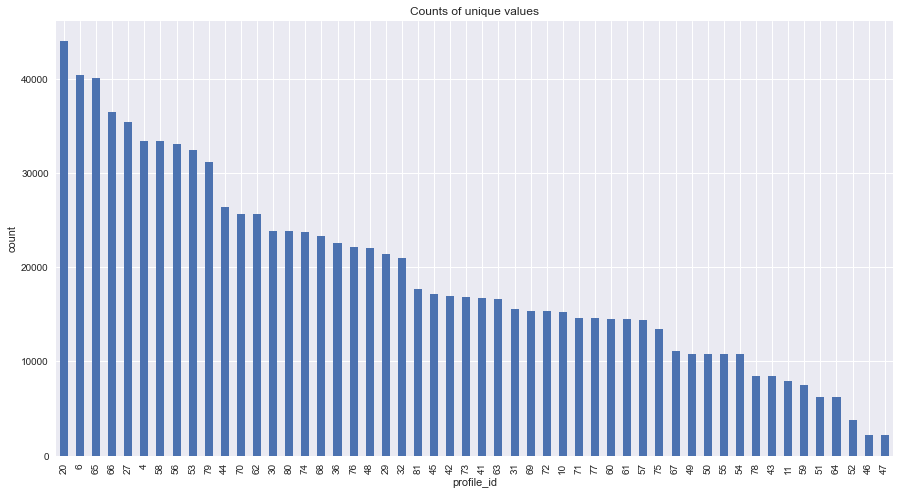

In [12]:
df['profile_id'].value_counts().plot(kind='bar', figsize=(15,8), title='Counts of unique values',
                                    xlabel='profile_id', ylabel='count');

In [13]:
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


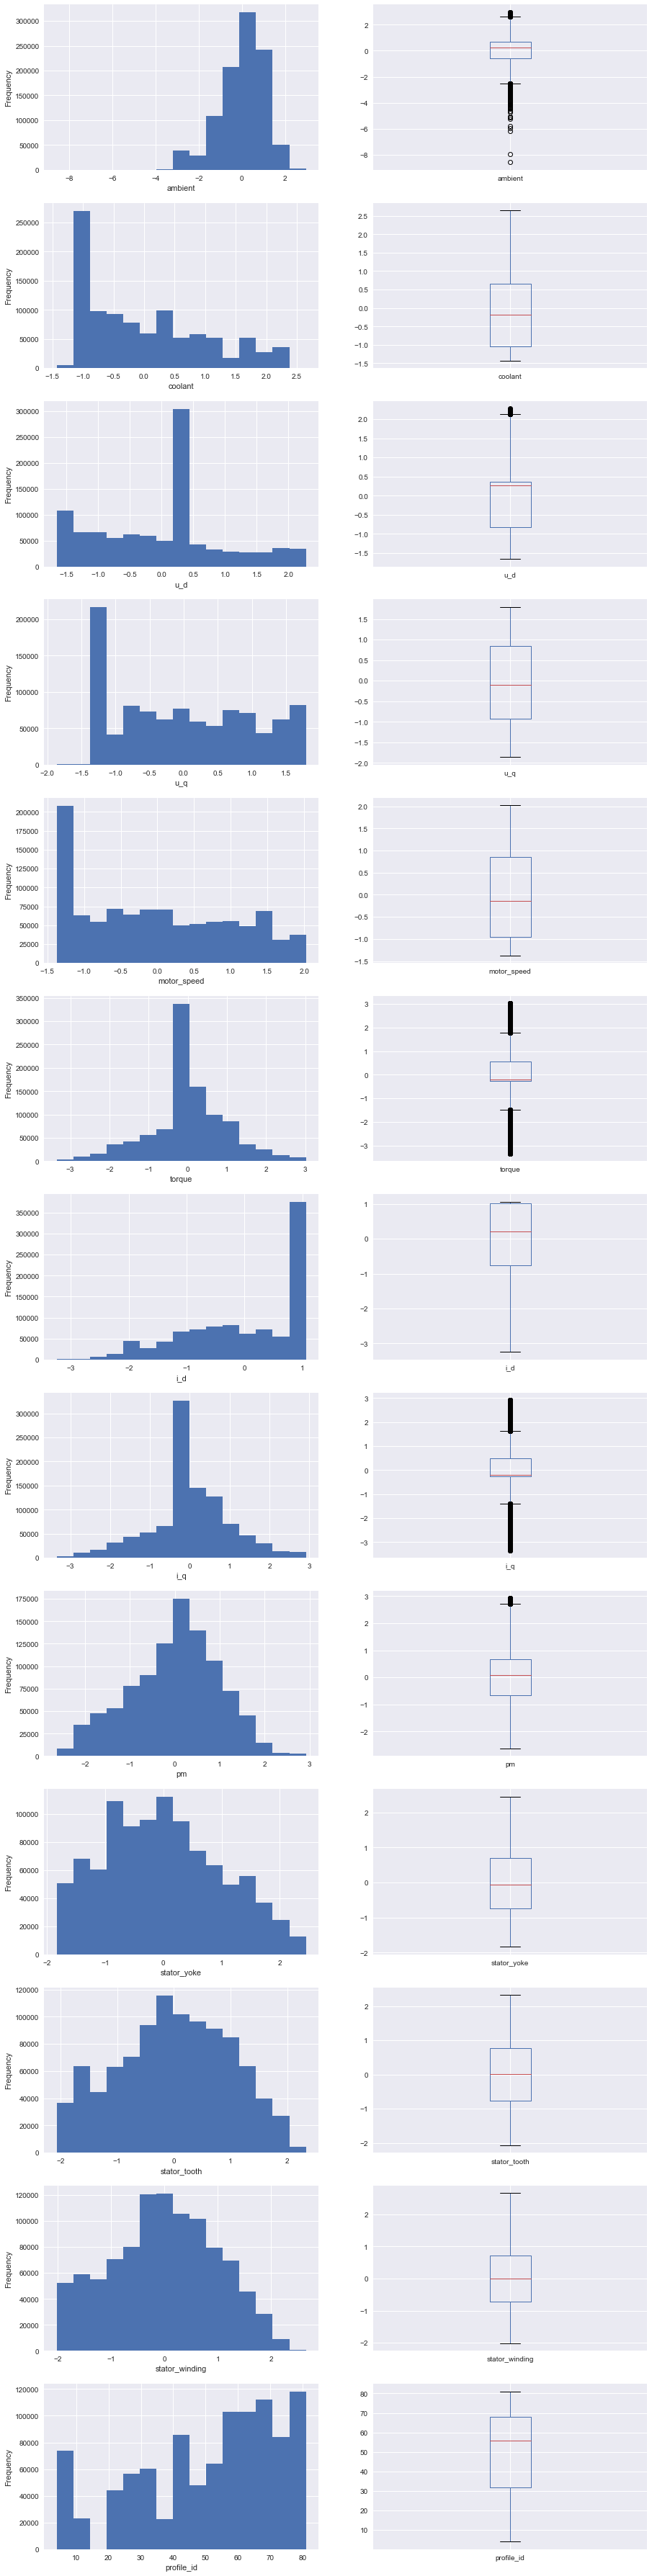

In [20]:
number_columns = df.columns.shape[0]
fig, axes = plt.subplots(nrows=number_columns, ncols=2, figsize=(15,5*number_columns))
for i, col in enumerate(df):
    df[col].plot(kind='hist', ax=axes[i,0], bins=15)
    axes[i,0].set_xlabel(col)
#     axes[i,0].set_xlabel(df.columns[i])
    df[col].plot(kind='box', ax=axes[i,1])

## Insight!
What did you find? Anything interesting?

In [22]:
df_clean = df[df['ambient']>-4].copy()

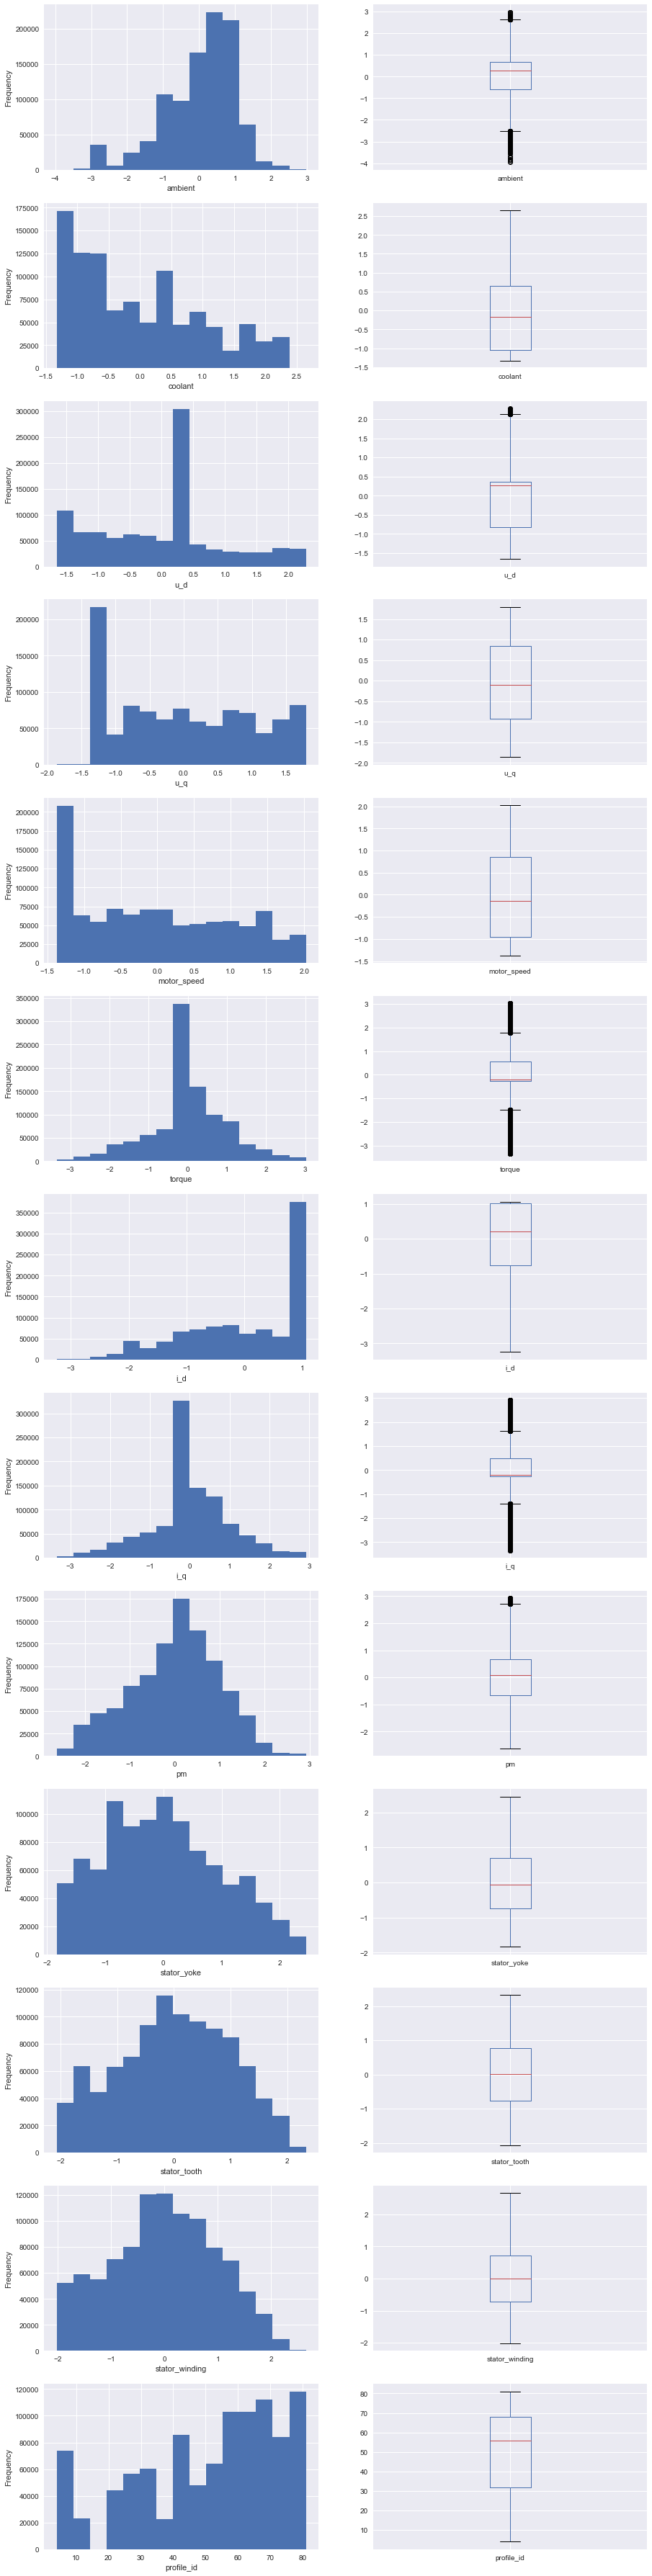

In [23]:
number_columns = df_clean.columns.shape[0]
fig, axes = plt.subplots(nrows=number_columns, ncols=2, figsize=(15,5*number_columns))
for i, col in enumerate(df_clean):
    df_clean[col].plot(kind='hist', ax=axes[i,0], bins=15)
    axes[i,0].set_xlabel(col)
#     axes[i,0].set_xlabel(df_clean.columns[i])
    df_clean[col].plot(kind='box', ax=axes[i,1])

In [ ]:
sns.pairplot(df_clean);

In [24]:
df_clean.corr()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
ambient,1.000000,0.434499,0.194797,0.087495,0.078317,-0.262322,0.005595,-0.260620,0.501659,0.451791,0.396897,0.302007,0.384745
coolant,0.434499,1.000000,0.178705,0.027857,-0.033332,-0.189609,0.108486,-0.186052,0.430545,0.874045,0.689009,0.509303,0.499680
u_d,0.194797,0.178705,1.000000,-0.027471,-0.233831,-0.821326,0.358515,-0.796587,-0.082571,0.041424,-0.066260,-0.150718,0.300769
u_q,0.087495,0.027857,-0.027471,1.000000,0.716896,-0.037261,-0.181856,-0.026347,0.101242,0.106193,0.149025,0.125454,-0.122264
motor_speed,0.078317,-0.033332,-0.233831,0.716896,1.000000,0.024522,-0.722918,0.006326,0.332424,0.182570,0.333920,0.393167,-0.166229
torque,-0.262322,-0.189609,-0.821326,-0.037261,0.024522,1.000000,-0.239054,0.996560,-0.072901,-0.092203,-0.011054,0.080980,-0.257443
i_d,0.005595,0.108486,0.358515,-0.181856,-0.722918,-0.239054,1.000000,-0.204223,-0.299229,-0.179906,-0.387715,-0.539928,0.142365
i_q,-0.260620,-0.186052,-0.796587,-0.026347,0.006326,0.996560,-0.204223,1.000000,-0.086482,-0.098749,-0.025190,0.060948,-0.256124
pm,0.501659,0.430545,-0.082571,0.101242,0.332424,-0.072901,-0.299229,-0.086482,1.000000,0.695012,0.768352,0.729562,0.156738
stator_yoke,0.451791,0.874045,0.041424,0.106193,0.182570,-0.092203,-0.179906,-0.098749,0.695012,1.000000,0.949897,0.845144,0.398026


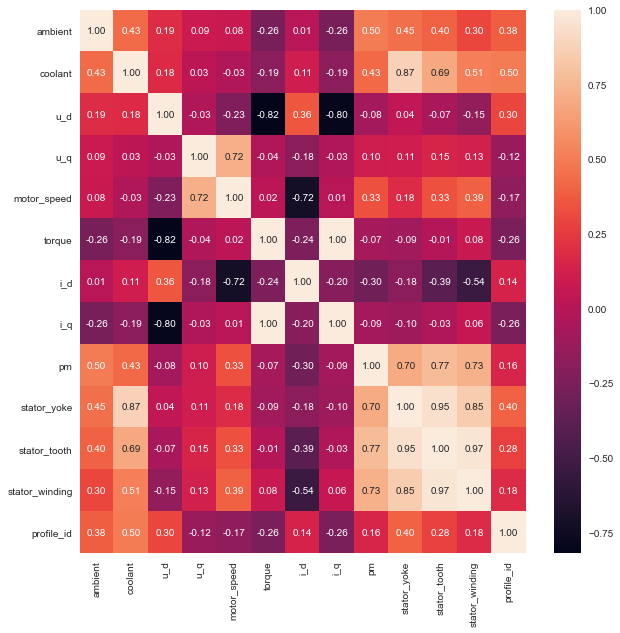

In [25]:
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", ax=axes);

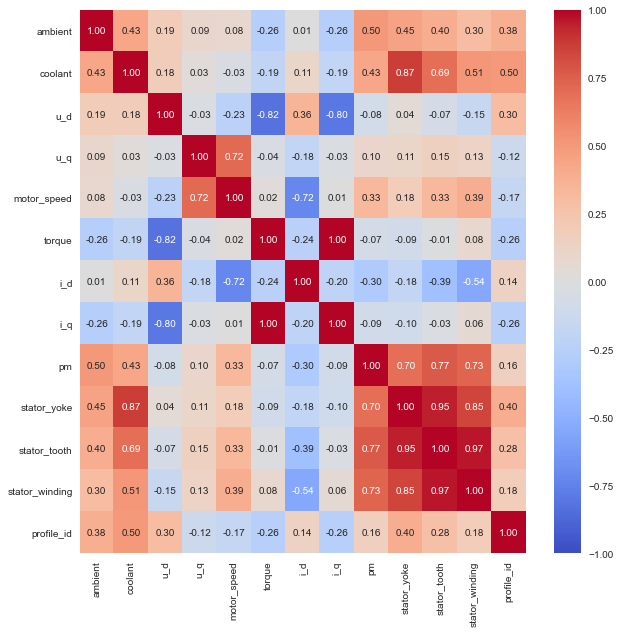

In [26]:
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", ax=axes, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

# Export Train Set

In [ ]:
df_clean[~df_clean['profile_id'].isin([65,72])].to_csv('train.csv', index=False)